### 1. 
1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).



In [63]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [43]:
def ruletka():
    x = [
        0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27,
        13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1,
        20, 14, 31, 9, 22, 18, 29, 7, 28, 12, 35, 3, 26
    ]
    num = random.choice(x)
    if x.index(num) % 2 != 0 and num != 0:
        color = 'red'
    elif x.index(num) % 2 == 0 and num != 0:
        color = 'black'
    else:
        color = ''
    return num, color

In [44]:
result = pd.Series([0 for _ in range(37)], index=[i for i in range(37)])
for _ in range(1000):
    result[ruletka()[0]] += 1

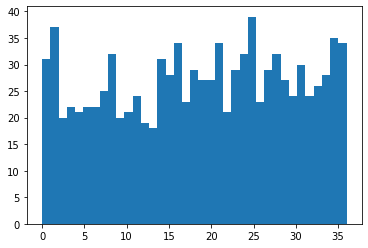

In [45]:
plt.hist(result.index, bins=37, weights=result)
plt.show()

### 2. 
Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х9

In [46]:
x = []
list_sum = []
for i in range(10):
    x = np.random.rand(10)
    s = x.sum()
    list_sum += [s]
    

In [47]:
list_sum

[4.374310303368256,
 3.940491127924056,
 4.768252573436841,
 5.549221127104218,
 4.089772769949222,
 5.544715462035413,
 4.3851305350719905,
 3.225272067064666,
 4.896626331124002,
 4.805478407032559]

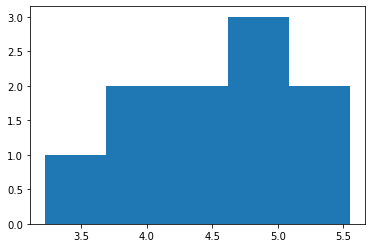

In [48]:
plt.hist(list_sum, bins=5)
plt.show()

### 3.
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [49]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(len(x)):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

3788 10000 0.3788


In [50]:
k = 2
n = 4

In [52]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))
P = c * 1/2**n
P

0.375

In [55]:
k = 0
n = 10_000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
x = a + b + c + d + f
for i in range(len(x)):
    if x[i] == 3:
        k += 1
print(k, n, k/n)

3117 10000 0.3117


In [56]:
k = 3
n = 5

In [57]:
c = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k)))
P = c * 1/2**n
P

0.3125

### 4.
(не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [58]:
import itertools
for p in itertools.permutations('0123456', 2):
    print(*p, sep='')


01
02
03
04
05
06
10
12
13
14
15
16
20
21
23
24
25
26
30
31
32
34
35
36
40
41
42
43
45
46
50
51
52
53
54
56
60
61
62
63
64
65


In [59]:
n = 7
k = 2
n * (n - k + 1)

42

In [61]:
for p in itertools.combinations('0123456', 3):
    print(*p, sep='')

012
013
014
015
016
023
024
025
026
034
035
036
045
046
056
123
124
125
126
134
135
136
145
146
156
234
235
236
245
246
256
345
346
356
456


In [62]:
n = 7
k = 3
math.factorial(n) / (math.factorial(k) * math.factorial(n - k))


35.0

### 5. Дополните код расчетом коэффициента корреляции x и y по формуле:


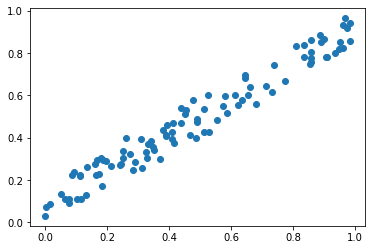

In [64]:
n = 100
r = 0.8
x = np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')

In [65]:
np.corrcoef(x,y)


array([[1.        , 0.97699808],
       [0.97699808, 1.        ]])

In [66]:
np.sum((x - x.mean()) * (y - y.mean())) / np.sqrt(np.sum((x - x.mean()) ** 2) * np.sum((y - y.mean()) ** 2))


0.9769980831652576